In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {3:.4f}, F1:{3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [6]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.6392, F1:0.6392, AUC: 0.7919


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행 
    #정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
   
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


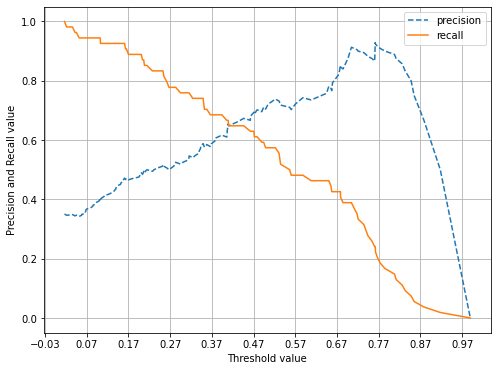

In [8]:
# 정밀도 / 재현율 트레이드오프(Trade-off) - 상호 보완전 평가지표
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [9]:
# BloodPressure, Glucose.. 0인 값이 있음
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  6.,  4.,
         7., 12.,  9., 17., 10., 15., 20., 16., 20., 17., 20., 26., 22.,
        19., 25., 25., 20., 18., 21., 18., 17., 17., 21., 25., 14., 25.,
        12., 10., 10., 16., 13., 10., 11., 12., 16.,  5.,  9.,  6., 11.,
         5., 10.,  4.,  9.,  7.,  6.,  5.,  5.,  7.,  4.,  3.,  6., 10.,
         4.,  3.,  5.,  6.,  2.,  2.,  5.,  7.,  2.]),
 array([  0.  ,   1.99,   3.98,   5.97,   7.96,   9.95,  11.94,  13.93,
         15.92,  17.91,  19.9 ,  21.89,  23.88,  25.87,  27.86,  29.85,
         31.84,  33.83,  35.82,  37.81,  39.8 ,  41.79,  43.78,  45.77,
         47.76,  49.75,  51.74,  53.73,  55.72,  57.71,  59.7 ,  61.69,
         63.68,  65.67,  67.66,  69.65,  71.64,  73.63,  75.62,  77.61,
         79.6 ,  81.59,  83.58,  85.57,  87.56,  89.55,  91.54,  93.53,
  

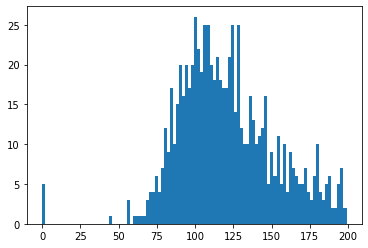

In [10]:
plt.hist(diabetes_data['Glucose'], bins=100)

In [11]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes_data['Glucose'].count()
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(
        feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [12]:
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, 
                                                                    diabetes_data[zero_features].mean())

In [13]:
diabetes_data[zero_features].mean()

Glucose          121.681605
BloodPressure     72.254807
SkinThickness     26.606479
Insulin          118.660163
BMI               32.450805
dtype: float64

In [14]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=156,
                                                   stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [20 34]]
정확도: 0.7987, 정밀도: 0.7556, 재현율: 0.6869, F1:0.6869, AUC: 0.8409


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_ptoba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값: {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

In [52]:
# def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
#     # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
#     for custom_threshold in thresholds:
#         binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
#         custom_predict = binarizer.transform(pred_proba_c1)
#         print(f'임곗값: {custom_threshold}')
#         get_clf_eval(y_test, custom_predict)

In [67]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, -1].reshape(-1, 1), thresholds)

ValueError: Expected 2D array, got 1D array instead:
array=[0.02178103 0.20835925 0.15491304 0.49417147 0.04521134 0.5882719
 0.7440702  0.2038365  0.15100754 0.15556963 0.67828647 0.49895359
 0.06555361 0.41044128 0.21076856 0.12144156 0.7538427  0.40665109
 0.03584712 0.78510879 0.46240326 0.30151531 0.06813244 0.33973941
 0.34347627 0.11167076 0.91770694 0.65564043 0.17031559 0.8118242
 0.20075238 0.20553368 0.1398487  0.23133006 0.15171373 0.70465214
 0.27898193 0.68451576 0.8078428  0.60809327 0.40813088 0.33908297
 0.65039897 0.25119317 0.31264676 0.04203782 0.76039002 0.13033088
 0.48979172 0.294846   0.34285408 0.82624865 0.84769044 0.0855219
 0.15876972 0.31502577 0.09990033 0.36651441 0.39403243 0.40906442
 0.22738198 0.73446188 0.36856048 0.55665158 0.23900901 0.10299296
 0.19940271 0.7109967  0.16520516 0.67853264 0.08479508 0.35795295
 0.14394099 0.46232954 0.67443171 0.26721085 0.09015084 0.10161531
 0.14210425 0.37738478 0.09685317 0.1022841  0.72079129 0.19730052
 0.2833536  0.34910675 0.76164412 0.71800607 0.0830324  0.06622685
 0.06793258 0.14005176 0.73925138 0.26218044 0.35226059 0.6448362
 0.21430779 0.50471349 0.05803964 0.6962639  0.85505959 0.57085659
 0.33025739 0.25286335 0.12717841 0.44652178 0.37853755 0.42970514
 0.05197767 0.10242384 0.53283772 0.47086086 0.16300565 0.1951088
 0.2729274  0.40574803 0.77353551 0.11277251 0.32404152 0.98964234
 0.53481607 0.01672616 0.87846941 0.65749346 0.20669966 0.31558697
 0.10481413 0.06946029 0.25505804 0.28102694 0.079888   0.08958657
 0.35052123 0.09201643 0.06750487 0.47182791 0.83345579 0.76246651
 0.07471407 0.13717966 0.10780481 0.56016352 0.53110859 0.16078318
 0.65918015 0.058098   0.18051657 0.05474329 0.76698017 0.52234377
 0.40684617 0.06592777 0.47853634 0.13505634].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[87 13]
 [19 35]]
정확도: 0.7922, 정밀도: 0.7292, 재현율: 0.6863, F1:0.6863, AUC: 0.8409
